# Supervised learning lab

### 1) Datasets 

In [1]:
from sklearn import datasets
irisData = datasets.load_iris()
print (irisData.data[:10])
print (irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
print("Target names:")
print(irisData.feature_names)

Target names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print("Target names:")
print(irisData.target_names)

Target names:
['setosa' 'versicolor' 'virginica']


Number of instances per type

In [4]:
import numpy as np
for index in np.unique(irisData.target):
    print("type " + irisData.target_names[index] + " contains "+ str(len(irisData.target[irisData.target == index])) + " instances")

type setosa contains 50 instances
type versicolor contains 50 instances
type virginica contains 50 instances


In [5]:
print(f"attributes of 32nd element: {irisData.data[31]} the class is: {irisData.target_names[irisData.target[31]]} ({irisData.target[31]})")

attributes of 32nd element: [5.4 3.4 1.5 0.4] the class is: setosa (0)


plot entries based on 'sepal length (cm)' and 'sepal width (cm)'

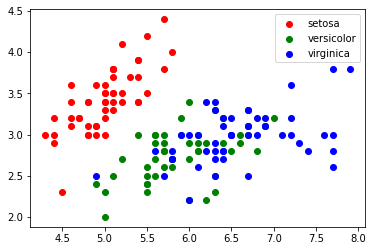

In [6]:
import pylab as pl
from itertools import cycle
def plot_2D_sepal(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)  #on utilise les attributs sepal
    pl.legend()
    pl.show()
plot_2D_sepal(irisData.data, irisData.target, irisData.target_names)

plot entries base on 'petal length (cm)' and 'petal width (cm)'

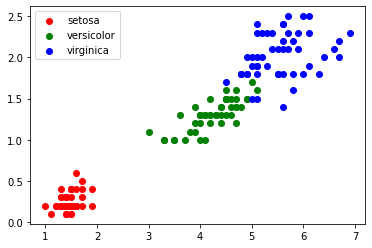

In [7]:
def plot_2D_petal(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names): #i attribut c colors label for names
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)  #on utilise les attributs pétales
    pl.legend()
    pl.show()
plot_2D_petal(irisData.data, irisData.target, irisData.target_names)

Here we can visually see that we can draw a line dividing the 'setosa' class from the other two

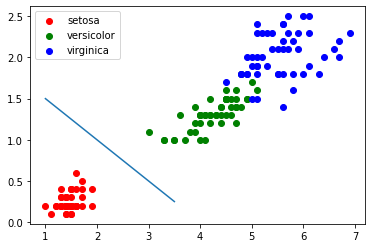

In [8]:
def plot_2D_petal_reg(data, target, target_names):
    x = np.linspace(1,3.5,100)
    y = (-1/2)*x+ 2
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names): #i attribut c colors label for names
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)  #on utilise les attributs pétales
    pl.plot(x, y) 
    pl.legend()
    pl.show()
plot_2D_petal_reg(irisData.data, irisData.target, irisData.target_names)

Here we plot a line: y= -1/2*x + 2

### 2) Introduction to classifiers

Here we train the classifier on the whole dataset, which means that tests are going to be performed on the same data that the model trained with

fit_prior: Weather to learn the probablility of each class or no, if False a uniform prior will be used

In [9]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
#train
nb.fit(irisData.data[:], irisData.target[:]);

Predict the target of the 32nd element

In [10]:
instance_31 = nb.predict([irisData.data[31]])
print(f"predicted: {instance_31[0]}, observation: {irisData.target[31]}")

predicted: 0, observation: 0


Predict the target of the last element

In [11]:
last_instance = nb.predict([irisData.data[-1]])
print(f"predicted: {last_instance[0]}, observation: {irisData.target[-1]}")

predicted: 2, observation: 2


Prediction of all instances

In [12]:
all_instances = nb.predict(irisData.data[:])
print("predicted:")
print(all_instances)
print("observation:")
print(irisData.target)

predicted:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
observation:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here we train the model only on the first 100 elements and use the rest for testing

In [13]:
nb.fit(irisData.data[:99], irisData.target[:99])
print("prediction:")
print(nb.predict(irisData.data[100:]))
print("observation:")
print(irisData.target[100:])

prediction:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
observation:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


Predict the target of the 32nd element

In [14]:
instance_31 = nb.predict([irisData.data[31]])
print(f"predicted: {instance_31[0]}, observation: {irisData.target[31]}")

predicted: 0, observation: 0


Predict the target of the last element

In [15]:
last_instance = nb.predict([irisData.data[-1]])
print(f"predicted: {last_instance[0]}, observation: {irisData.target[-1]}")

predicted: 1, observation: 2


### 3) Performance evaluation

In [16]:
nb.fit(irisData.data[:], irisData.target[:])
Y = irisData.target                 #observation
P = nb.predict(irisData.data[:])    #prediction

Calculate error rate

In [17]:
ea = 0
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
ea = ea /len(irisData.data)
print(f"error rate = {'{:.3f}'.format(ea)}")

error rate = 0.047


We can also use a more compact numpy notation like follows

In [18]:
ea2 = len(Y[(Y - P)!=0])/len(irisData.data)
print(f"error rate = {'{:.3f}'.format(ea2)}")

ea3 = np.count_nonzero(P-Y)/len(irisData.data)
print(f"error rate = {'{:.3f}'.format(ea3)}")

error rate = 0.047
error rate = 0.047


accuracy is the rate of correctly classified entries, it is also the compliment of the error rate

In [19]:
accuracy = nb.score(irisData.data, irisData.target)
print(f"accuracy  = {'{:.3f}'.format(accuracy)}")
print(f"1 - error = {'{:.3f}'.format(1-ea3)}")

accuracy  = 0.953
1 - error = 0.953


split splits the dataset into two datasets S1 and S2 based on a proportion where S1 is used for training and S2 used for testing

In [20]:
def split(data,proportion):
    dataS1 = np.empty(shape=(0,np.shape(data.data)[1]))
    targetS1 = np.empty(shape=(0,))
    dataS2 = np.empty(shape=(0,np.shape(data.data)[1]))
    targetS2 = np.empty(shape=(0,))
    for i in set(data.target):
        class_data = data.data[data.target == i]
        m = round(proportion * len(class_data))
        np.random.permutation(class_data)
        dataS1= np.concatenate((dataS1,class_data[:m]),axis=0)
        class_target = np.repeat(i,m)
        targetS1= np.concatenate((targetS1,class_target),axis=0)
        dataS2= np.concatenate((dataS2,class_data[m:]),axis=0)
        class_target2 = np.repeat(i,len(class_data)-m)
        targetS2= np.concatenate((targetS2,class_target2),axis=0)
    return (dataS1,targetS1,dataS2,targetS2)
dataS1,targetS1,dataS2,targetS2 = split(irisData, 2/3)
print(f"train={len(dataS1)}, test={len(dataS2)}")
print("number of instances of each class in the training dataset")
print(f"0:{len(targetS1[targetS1 == 0])}, 1:{len(targetS1[targetS1 == 1])}, 2:{len(targetS1[targetS1 == 2])}")

train=99, test=51
number of instances of each class in the training dataset
0:33, 1:33, 2:33


the following function splits the dataset into two parts, trains on one and tests on the other
clf: a classifier passed to the function as an argument

In [21]:
def test(data, clf,proportion):
    dataS1,targetS1,dataS2,targetS2 = split(data,proportion)
    clf.fit(dataS1, targetS1)
    accuracy = clf.score(dataS2, targetS2)
    error = 1 - accuracy
    return error
clf = naive_bayes.MultinomialNB(fit_prior=True)
error = test(irisData,clf,2/3)
print(f"error = {error}")

error = 0.039215686274509776


test_iter runs the test 'iter' times and returns the average of the reported error rate

In [22]:
def test_iter(data,clf,iter,proportion):
    sum = 0
    for i in range(iter):
        sum += test(data,clf,proportion)
    return sum / iter

iterations = [10,50,100,200,500,1000]
last_avg = -1
for iter in iterations:
    error_moy = test_iter(irisData,clf,iter,2/3)
    if(last_avg == -1):
        print(f"average error for {iter} iterations: {error_moy}")
    else:
        print(f"average error for {iter} iterations: {error_moy}, (difference = {error_moy - last_avg})")
    last_avg = error_moy

average error for 10 iterations: 0.039215686274509776
average error for 50 iterations: 0.03921568627450973, (difference = -4.85722573273506e-17)
average error for 100 iterations: 0.03921568627450969, (difference = -3.469446951953614e-17)
average error for 200 iterations: 0.039215686274509685, (difference = -6.938893903907228e-18)
average error for 500 iterations: 0.03921568627450967, (difference = -1.3877787807814457e-17)
average error for 1000 iterations: 0.03921568627450967, (difference = 0.0)


The last tests were using 2/3 split proportions
- using a 9/10 split

In [23]:
error_moy = test_iter(irisData, clf, 1000, 9/10)
print(f"average error for {iter} iterations: {error_moy}")

average error for 1000 iterations: 0.0


- using a 1/3 split

In [24]:
error_moy = test_iter(irisData, clf, 1000, 1/3)
print(f"average error for {iter} iterations: {error_moy}")

average error for 1000 iterations: 0.050505050505051406


the library sklearn has implemented a function that splits a dataset into training and testing set based on a proportion

In [25]:
from sklearn.model_selection import train_test_split
def test2(data, clf,proportion):
    x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, train_size=proportion)
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)
    error = 1 - accuracy
    return error
error = test2(irisData, clf, 2/3)
print(f"error = {error} with 2/3 proportion")
error = test2(irisData, clf, 9/10)
print(f"error = {error} with 9/10 proportion")
error = test2(irisData, clf, 1/3)
print(f"error = {error} with 1/3 proportion")

error = 0.36 with 2/3 proportion
error = 0.06666666666666665 with 9/10 proportion
error = 0.33999999999999997 with 1/3 proportion


#### Cross validation


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = [naive_bayes.MultinomialNB(fit_prior=True), DecisionTreeClassifier()]
folds = [2,3,5,8,10]
for c in clf:
    print(f"clf:{c}")
    for i in folds:
        accuracy = cross_val_score(c, irisData.data, irisData.target, cv=i)
        average_accuracy = np.average(accuracy)
        error = 1 - average_accuracy
        print(f"error({i}):{error}")

clf:MultinomialNB()
error(2):0.046666666666666634
error(3):0.053333333333333344
error(5):0.046666666666666634
error(8):0.05263157894736836
error(10):0.046666666666666634
clf:DecisionTreeClassifier()
error(2):0.040000000000000036
error(3):0.033333333333333326
error(5):0.039999999999999813
error(8):0.03289473684210531
error(10):0.040000000000000036


Here we can see that desicion trees have lower error rates than the naive bayes classifier
this could be explained by the fact that decision trees are more flexible and can automatically determine the best features to work with
we determined earlier that petal length/width give us clearer division than sepal length/width which is reflected in the figure of the tree down below

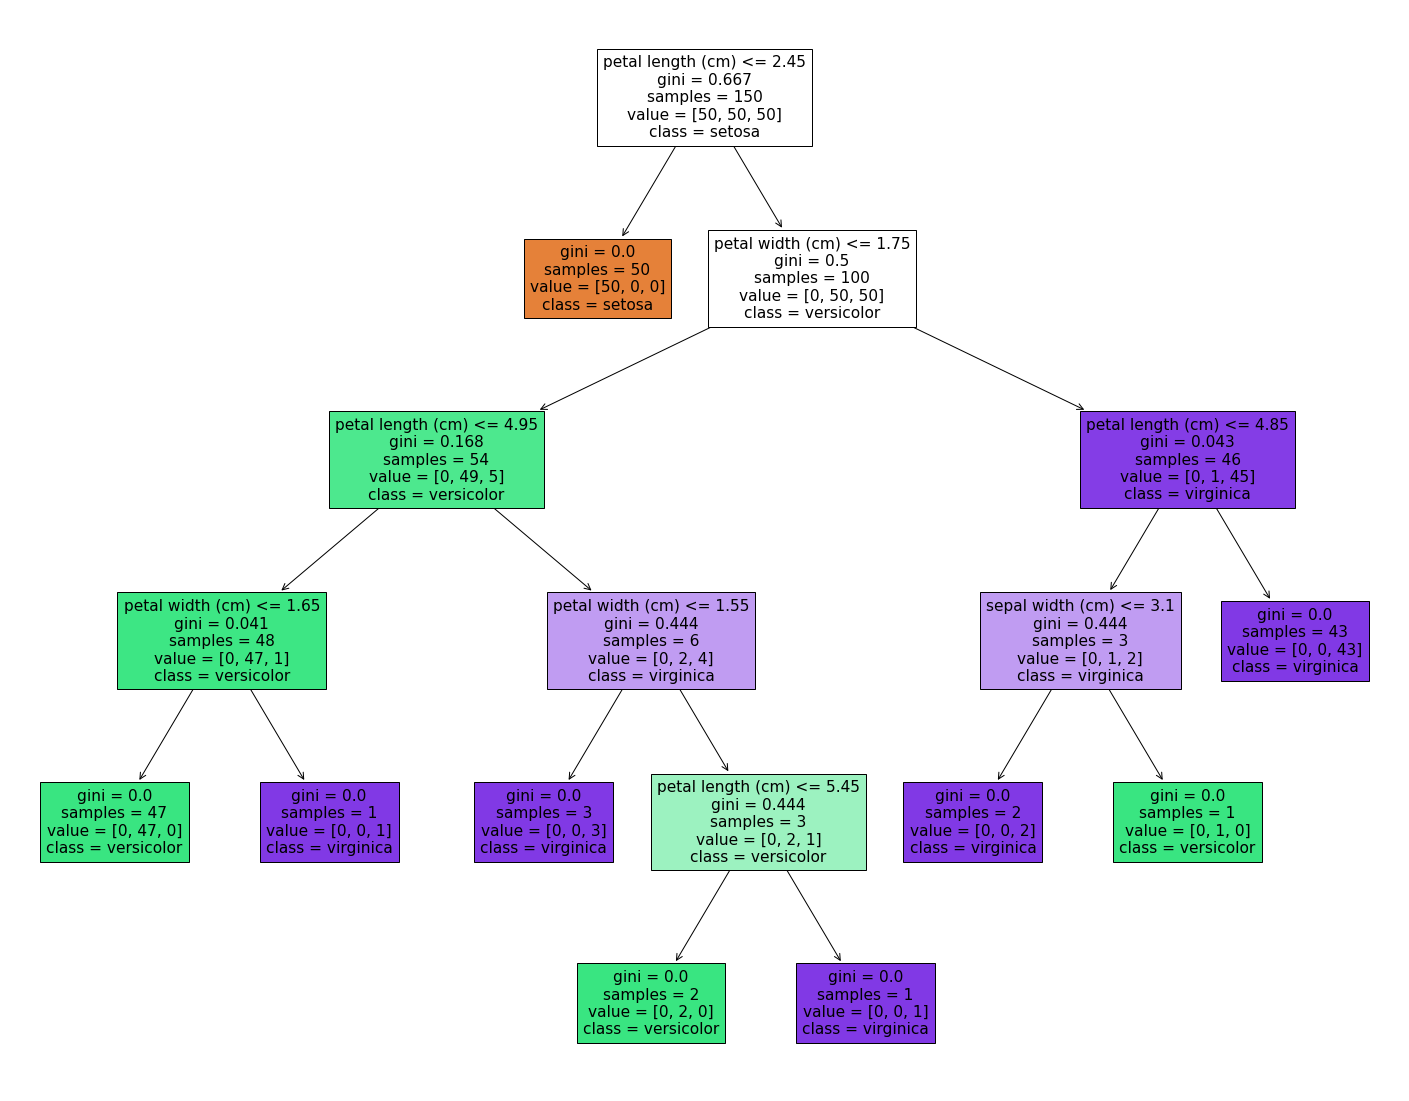

In [27]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier().fit(irisData.data, irisData.target)
fig = pl.figure(figsize=(25,20))
_ = plot_tree(clf, 
                   feature_names=irisData.feature_names,  
                   class_names=irisData.target_names,
                   filled=True)
pl.show()

naive bayes on the other hand has no built in algorithms to determine which features are best to use, this responsability falls onto us and here we are are not providing the classifier any insight into the level of importance of each feature